<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/ModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv 
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [0]:
with open('/content/featuresFinal_withNOV.bin','rb') as file:
  f_n=pickle.load(file)

with open('/content/features_November_withshadpur.bin','rb') as file:
  f_ns=pickle.load(file)

with open('/content/labelsFinal_withNOV.bin','rb') as file:
  l_n=pickle.load(file)
  
with open('/content/labels_November_withshadipur.bin','rb') as file:
  l_ns=pickle.load(file)

In [12]:
print(np.shape(f_n))
print(np.shape(f_ns))
print(np.shape(l_n))
print(np.shape(l_ns))

(2753, 10)
(356, 10)
(2753, 1)
(356, 1)


In [0]:
features = np.vstack((f_n,f_ns))
pm = np.vstack((l_n,l_ns))

In [17]:
print(np.shape(features))
print(np.shape(pm))

(3109, 10)
(3109, 1)


In [0]:
features = list(map(np.float32,features))
pm = list(map(np.float32,pm))

In [0]:
with open('/content/features_18_11.bin','wb') as file:
  pickle.dump(features,file)

with open('/content/labels_18_11.bin','wb') as file:
  pickle.dump(pm,file)

52.076378


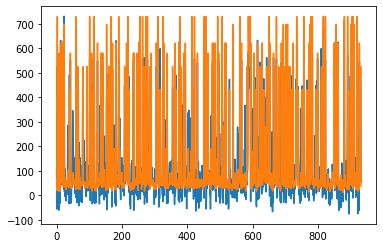

In [20]:

lineareg = LinearRegression(normalize =False)
cross = cross_val_score(lineareg, features,pm, scoring ='neg_mean_absolute_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)
lineareg.fit(x_train, y_train)
pred = lineareg.predict(x_test)
plt.plot(pred)
plt.plot(y_test)
print(mean_absolute_error(pred, y_test))


In [0]:
with open('/content/LR_withNOV.bin','wb') as file:
  pickle.dump(lineareg,file)



In [22]:
print(((-1)*cross))

[ 87.90281677  52.2177124  281.79443359]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

16.419836969571133


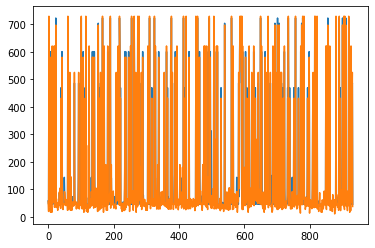

In [24]:
reg = RandomForestRegressor(max_depth=3) 
cross = cross_val_score(reg, features, pm, scoring ='neg_mean_absolute_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_absolute_error(pred, y_test))


In [0]:
#joblib.dump(reg,'Random_withITO.pkl')
with open('/content/RF_withNOV.bin','wb') as file:
  pickle.dump(reg, file)

In [26]:
print(((-1)*cross))

[ 39.83158833  11.02286372 272.42834881]
